In [1]:
import numpy as np
import scipy

import cupy as cp
import cupyx.scipy

import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload
import time

import warnings
warnings.filterwarnings("ignore")

import poppy
import hcipy as hci

import wfsc_tests as wfsc
wfsc.math_module.update_np(np)
wfsc.math_module.update_scipy(scipy)

import misc_funs as misc

import hcipy_models as hcim
c = hcim.PC()

In [2]:
influence_functions = hci.make_gaussian_influence_functions(c.pupil_grid, c.Nact, c.actuator_spacing)


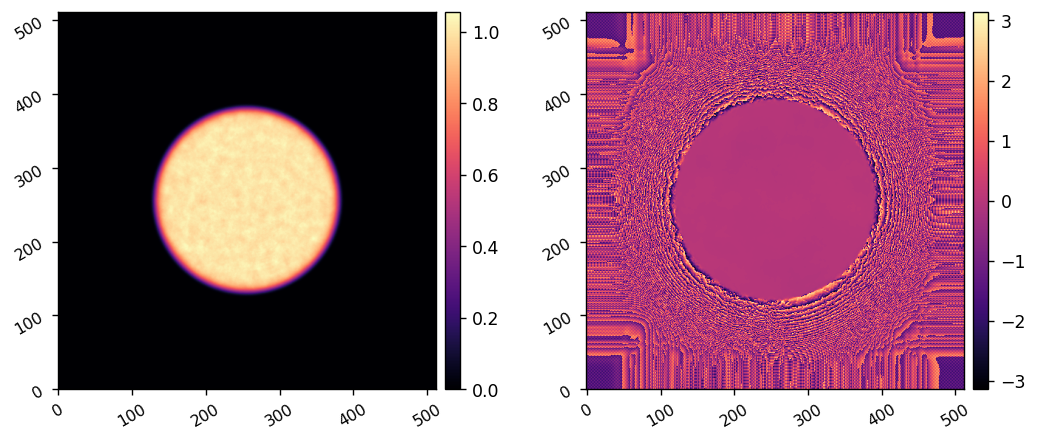

In [4]:
reload(hcim)
c = hcim.PC(influence_functions=influence_functions,
         dm1_dm2=200*u.mm,
         aberration_distance=500e-3*u.m)

aberrated_pupil = c.wfe_at_distance(hci.Wavefront(c.aperture, c.wavelength.to_value(u.m)))
misc.imshow2(aberrated_pupil.intensity.shaped, aberrated_pupil.phase.shaped)

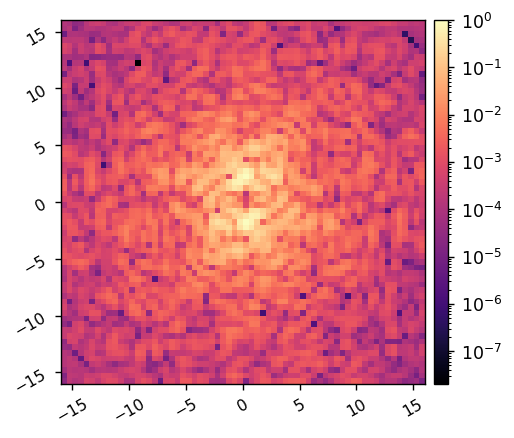

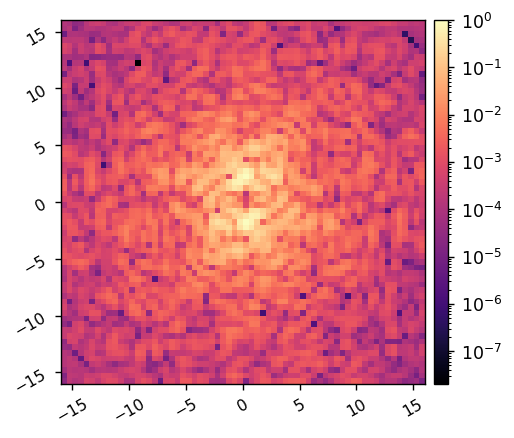

In [5]:
Nact = c.Nact
npsf = c.npsf

c.reset_dms()
ref_im = c.snap()
ref_max = ref_im.max()

misc.imshow1(ref_im/ref_max, lognorm=True, pxscl=c.psf_pixelscale_lamD)

c.norm = ref_max
im = c.snap()
misc.imshow1(im, lognorm=True, pxscl=c.psf_pixelscale_lamD)


# define the dark hole region

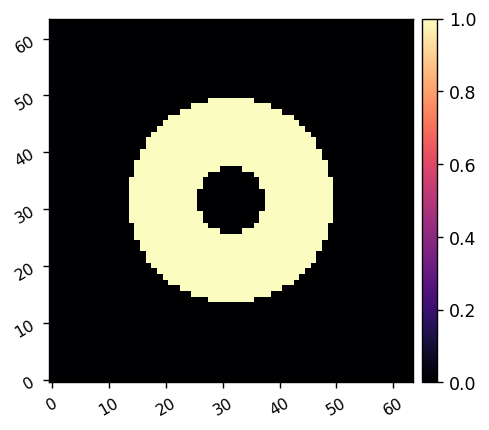

In [6]:
reload(wfsc)
reload(wfsc.utils)
reload(wfsc.imshows)
xfp = (np.linspace(-npsf/2, npsf/2-1, npsf) + 1/2)*c.psf_pixelscale_lamD
fpx,fpy = np.meshgrid(xfp,xfp)
fpr = np.sqrt(fpx**2 + fpy**2)
    
iwa = 3
owa = 9
roi_params = {
        'inner_radius' : iwa,
        'outer_radius' : owa,
#         'edge' : None,
        'rotation':0,
        'full':True,
    }
dark_mask = wfsc.utils.create_annular_focal_plane_mask(fpx, fpy, roi_params, plot=True)


In [7]:
reload(wfsc.efc_2dm)

c.reset_dms()

epsilon = 1e-9 # poke amplitudes (DM surface)
jac = wfsc.efc_2dm.build_jacobian(c, epsilon, dark_mask.ravel(), display=False)

Building Jacobian.
	Calculated response for mode 1/952. Elapsed time=0.636 sec.
	Calculated response for mode 2/952. Elapsed time=1.273 sec.
	Calculated response for mode 3/952. Elapsed time=1.911 sec.
	Calculated response for mode 4/952. Elapsed time=2.549 sec.
	Calculated response for mode 5/952. Elapsed time=3.187 sec.
	Calculated response for mode 6/952. Elapsed time=3.826 sec.
	Calculated response for mode 7/952. Elapsed time=4.466 sec.
	Calculated response for mode 8/952. Elapsed time=5.109 sec.
	Calculated response for mode 9/952. Elapsed time=5.753 sec.
	Calculated response for mode 10/952. Elapsed time=6.397 sec.
	Calculated response for mode 11/952. Elapsed time=7.039 sec.
	Calculated response for mode 12/952. Elapsed time=7.681 sec.
	Calculated response for mode 13/952. Elapsed time=8.315 sec.
	Calculated response for mode 14/952. Elapsed time=8.946 sec.
	Calculated response for mode 15/952. Elapsed time=9.579 sec.
	Calculated response for mode 16/952. Elapsed time=10.211 se

	Calculated response for mode 131/952. Elapsed time=83.182 sec.
	Calculated response for mode 132/952. Elapsed time=83.819 sec.
	Calculated response for mode 133/952. Elapsed time=84.458 sec.
	Calculated response for mode 134/952. Elapsed time=85.095 sec.
	Calculated response for mode 135/952. Elapsed time=85.732 sec.
	Calculated response for mode 136/952. Elapsed time=86.369 sec.
	Calculated response for mode 137/952. Elapsed time=87.007 sec.
	Calculated response for mode 138/952. Elapsed time=87.644 sec.
	Calculated response for mode 139/952. Elapsed time=88.282 sec.
	Calculated response for mode 140/952. Elapsed time=88.920 sec.
	Calculated response for mode 141/952. Elapsed time=89.557 sec.
	Calculated response for mode 142/952. Elapsed time=90.195 sec.
	Calculated response for mode 143/952. Elapsed time=90.834 sec.
	Calculated response for mode 144/952. Elapsed time=91.472 sec.
	Calculated response for mode 145/952. Elapsed time=92.109 sec.
	Calculated response for mode 146/952. E

	Calculated response for mode 258/952. Elapsed time=164.096 sec.
	Calculated response for mode 259/952. Elapsed time=164.734 sec.
	Calculated response for mode 260/952. Elapsed time=165.372 sec.
	Calculated response for mode 261/952. Elapsed time=166.010 sec.
	Calculated response for mode 262/952. Elapsed time=166.642 sec.
	Calculated response for mode 263/952. Elapsed time=167.273 sec.
	Calculated response for mode 264/952. Elapsed time=167.897 sec.
	Calculated response for mode 265/952. Elapsed time=168.516 sec.
	Calculated response for mode 266/952. Elapsed time=169.133 sec.
	Calculated response for mode 267/952. Elapsed time=169.754 sec.
	Calculated response for mode 268/952. Elapsed time=170.374 sec.
	Calculated response for mode 269/952. Elapsed time=170.990 sec.
	Calculated response for mode 270/952. Elapsed time=171.608 sec.
	Calculated response for mode 271/952. Elapsed time=172.224 sec.
	Calculated response for mode 272/952. Elapsed time=172.842 sec.
	Calculated response for 

	Calculated response for mode 385/952. Elapsed time=243.412 sec.
	Calculated response for mode 386/952. Elapsed time=244.046 sec.
	Calculated response for mode 387/952. Elapsed time=244.683 sec.
	Calculated response for mode 388/952. Elapsed time=245.324 sec.
	Calculated response for mode 389/952. Elapsed time=245.974 sec.
	Calculated response for mode 390/952. Elapsed time=246.623 sec.
	Calculated response for mode 391/952. Elapsed time=247.274 sec.
	Calculated response for mode 392/952. Elapsed time=247.926 sec.
	Calculated response for mode 393/952. Elapsed time=248.579 sec.
	Calculated response for mode 394/952. Elapsed time=249.233 sec.
	Calculated response for mode 395/952. Elapsed time=249.888 sec.
	Calculated response for mode 396/952. Elapsed time=250.562 sec.
	Calculated response for mode 397/952. Elapsed time=251.268 sec.
	Calculated response for mode 398/952. Elapsed time=251.973 sec.
	Calculated response for mode 399/952. Elapsed time=252.663 sec.
	Calculated response for 

	Calculated response for mode 512/952. Elapsed time=327.499 sec.
	Calculated response for mode 513/952. Elapsed time=328.165 sec.
	Calculated response for mode 514/952. Elapsed time=328.832 sec.
	Calculated response for mode 515/952. Elapsed time=329.500 sec.
	Calculated response for mode 516/952. Elapsed time=330.166 sec.
	Calculated response for mode 517/952. Elapsed time=330.835 sec.
	Calculated response for mode 518/952. Elapsed time=331.502 sec.
	Calculated response for mode 519/952. Elapsed time=332.170 sec.
	Calculated response for mode 520/952. Elapsed time=332.835 sec.
	Calculated response for mode 521/952. Elapsed time=333.501 sec.
	Calculated response for mode 522/952. Elapsed time=334.168 sec.
	Calculated response for mode 523/952. Elapsed time=334.838 sec.
	Calculated response for mode 524/952. Elapsed time=335.505 sec.
	Calculated response for mode 525/952. Elapsed time=336.172 sec.
	Calculated response for mode 526/952. Elapsed time=336.839 sec.
	Calculated response for 

	Calculated response for mode 639/952. Elapsed time=412.055 sec.
	Calculated response for mode 640/952. Elapsed time=412.705 sec.
	Calculated response for mode 641/952. Elapsed time=413.352 sec.
	Calculated response for mode 642/952. Elapsed time=414.001 sec.
	Calculated response for mode 643/952. Elapsed time=414.647 sec.
	Calculated response for mode 644/952. Elapsed time=415.296 sec.
	Calculated response for mode 645/952. Elapsed time=415.946 sec.
	Calculated response for mode 646/952. Elapsed time=416.594 sec.
	Calculated response for mode 647/952. Elapsed time=417.244 sec.
	Calculated response for mode 648/952. Elapsed time=417.895 sec.
	Calculated response for mode 649/952. Elapsed time=418.545 sec.
	Calculated response for mode 650/952. Elapsed time=419.195 sec.
	Calculated response for mode 651/952. Elapsed time=419.844 sec.
	Calculated response for mode 652/952. Elapsed time=420.493 sec.
	Calculated response for mode 653/952. Elapsed time=421.142 sec.
	Calculated response for 

	Calculated response for mode 766/952. Elapsed time=493.955 sec.
	Calculated response for mode 767/952. Elapsed time=494.601 sec.
	Calculated response for mode 768/952. Elapsed time=495.245 sec.
	Calculated response for mode 769/952. Elapsed time=495.889 sec.
	Calculated response for mode 770/952. Elapsed time=496.532 sec.
	Calculated response for mode 771/952. Elapsed time=497.176 sec.
	Calculated response for mode 772/952. Elapsed time=497.820 sec.
	Calculated response for mode 773/952. Elapsed time=498.464 sec.
	Calculated response for mode 774/952. Elapsed time=499.110 sec.
	Calculated response for mode 775/952. Elapsed time=499.754 sec.
	Calculated response for mode 776/952. Elapsed time=500.398 sec.
	Calculated response for mode 777/952. Elapsed time=501.042 sec.
	Calculated response for mode 778/952. Elapsed time=501.685 sec.
	Calculated response for mode 779/952. Elapsed time=502.330 sec.
	Calculated response for mode 780/952. Elapsed time=502.975 sec.
	Calculated response for 

	Calculated response for mode 893/952. Elapsed time=575.763 sec.
	Calculated response for mode 894/952. Elapsed time=576.407 sec.
	Calculated response for mode 895/952. Elapsed time=577.051 sec.
	Calculated response for mode 896/952. Elapsed time=577.695 sec.
	Calculated response for mode 897/952. Elapsed time=578.339 sec.
	Calculated response for mode 898/952. Elapsed time=578.983 sec.
	Calculated response for mode 899/952. Elapsed time=579.627 sec.
	Calculated response for mode 900/952. Elapsed time=580.270 sec.
	Calculated response for mode 901/952. Elapsed time=580.915 sec.
	Calculated response for mode 902/952. Elapsed time=581.560 sec.
	Calculated response for mode 903/952. Elapsed time=582.203 sec.
	Calculated response for mode 904/952. Elapsed time=582.847 sec.
	Calculated response for mode 905/952. Elapsed time=583.494 sec.
	Calculated response for mode 906/952. Elapsed time=584.138 sec.
	Calculated response for mode 907/952. Elapsed time=584.781 sec.
	Calculated response for 

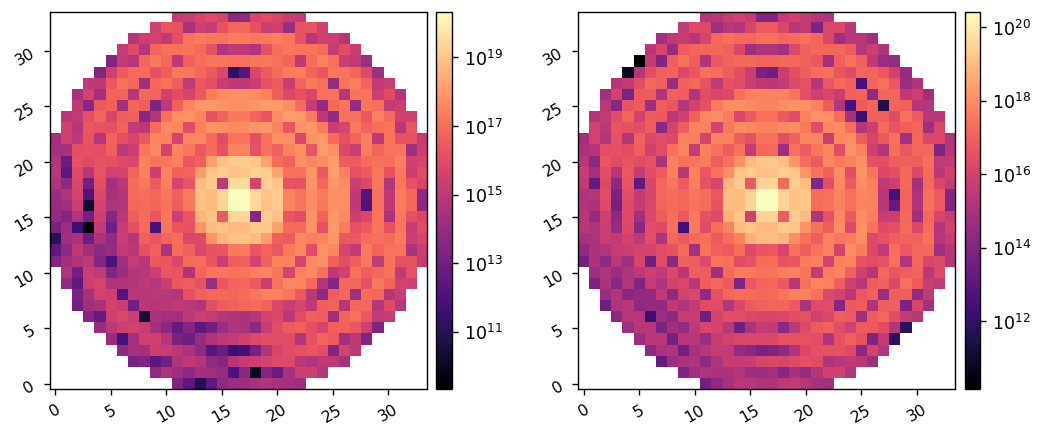

In [16]:
dm1_response = wfsc.utils.map_acts_to_dm( wfsc.utils.ensure_np_array(abs(jac[:,:952].sum(axis=0)))**2, c.dm_mask, Nact=Nact)
dm2_response = wfsc.utils.map_acts_to_dm( wfsc.utils.ensure_np_array(abs(jac[:,952:].sum(axis=0)))**2, c.dm_mask, Nact=Nact)
wfsc.imshow2(dm1_response, dm2_response,
               lognorm=True)

In [17]:
reload(wfsc.utils)

reg_fun = wfsc.utils.beta_reg
reg_conds = np.array([[0, 20],
                      [-1, -3]])

In [20]:
control_matrix = wfsc.utils.beta_reg(jac, -2)
display(control_matrix.shape)

(1904, 1816)

Beginning closed-loop EFC simulation.
Max singular value squared:	 4.049418607194122e+18
alpha^2:			 3.279711245538574e+17

	Running iteration 0/20.
(1904,)


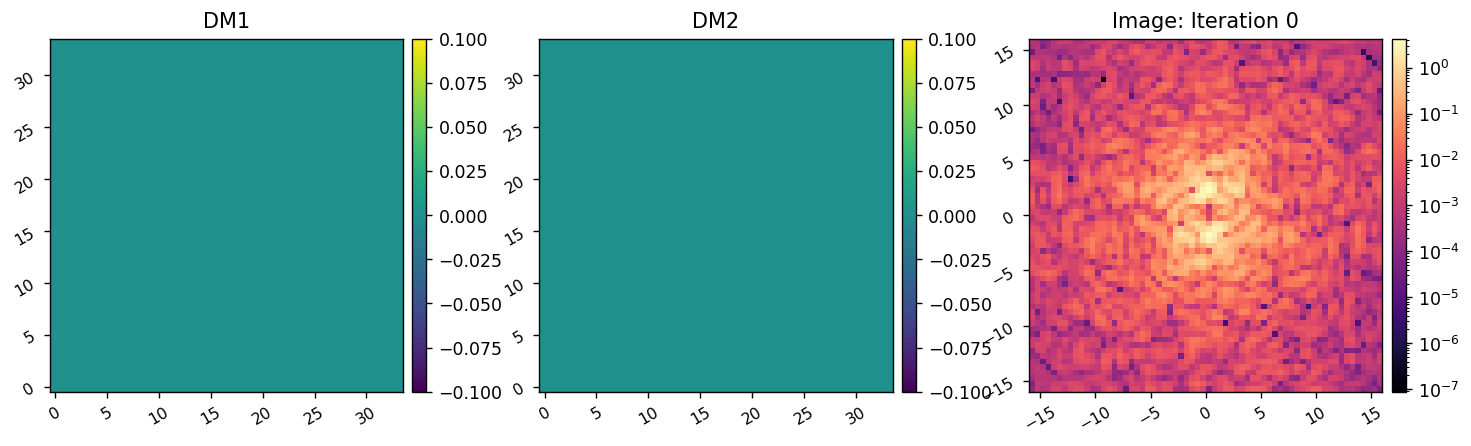

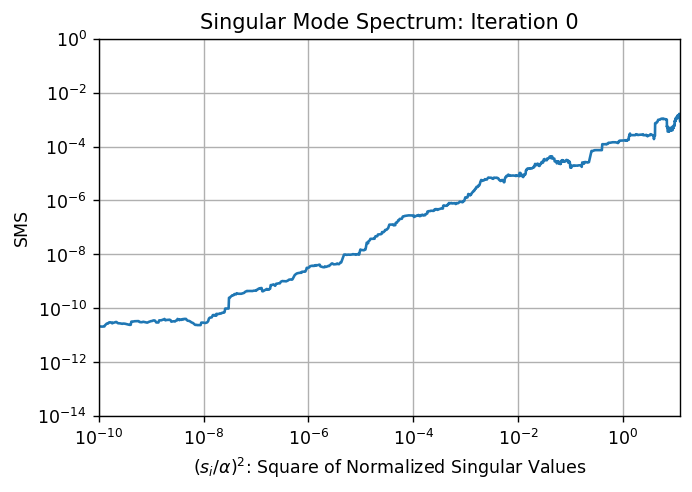

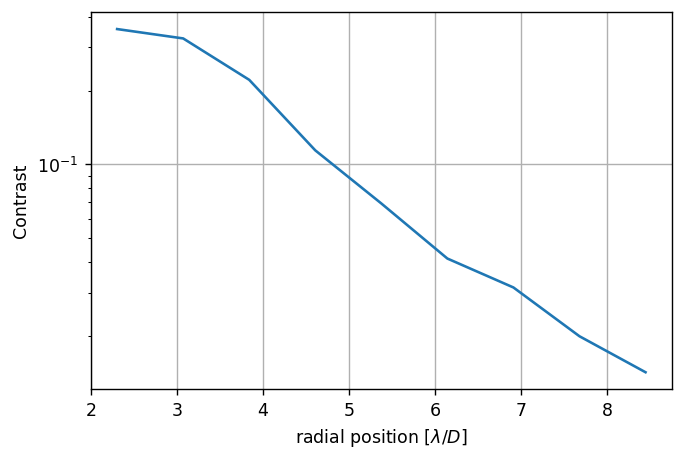

	Running iteration 1/20.
(1904,)
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_31426/942412599.py", line 12, in <cell line: 8>
    efields, dm1_commands, dm2_commands = wfsc.efc_2dm.run_efc_perfect(c,
  File "/home/u21/kianmilani/Documents/wfsc-tests/wfsc_tests/twodm/efc_2dm.py", line 133, in run_efc_perfect
    imshows.imshow3(dm1_commands[i], dm2_commands[i], np.abs(electric_field)**2,
  File "/home/u21/kianmilani/Documents/wfsc-tests/wfsc_tests/imshows.py", line 286, in imshow3
    if display_fig: display(fig)
  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/site-packages/IPython/core/display_functions.py", line 298, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/home/u21/kianmilani/.conda/envs/poppy39-exp-env/lib/python3.9/site-packages/IPyth

In [31]:
reload(wfsc.efc_2dm)
reload(wfsc.utils)

c.reset_dms()

reg_conds = [(-2,10), (-3, 20), (-4, 20)]

for i in range(len(reg_conds)):

    control_matrix = wfsc.utils.beta_reg(jac, reg_conds[i][0])
    
    efields, dm1_commands, dm2_commands = wfsc.efc_2dm.run_efc_perfect(c, 
                                                                     jac, 
                                                                     control_matrix,
                                                                     dark_mask, 
                                                                     Imax_unocc=1,
                                                                     efc_loop_gain=0.5, 
                                                                     iterations=20, 
                                                                     plot_all=True, 
                                                                     plot_current=True,
                                                                     plot_sms=True,
                                                                      plot_radial_contrast=True)